# Discretization / Binning

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns

In [95]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [96]:
df = pd.read_csv("train.csv", usecols=["Age", "Fare", "Survived"])
df.shape

(891, 3)

In [97]:
# dropping null value rows
df.dropna(inplace=True)
df.shape

(714, 3)

In [98]:
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)
X_train.head()

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542
253,30.0,16.1000
719,33.0,7.7750
666,25.0,13.0000


In [100]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [101]:
accuracy_score(y_test, y_pred)

0.6363636363636364

In [102]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring="accuracy"))

np.float64(0.6386932707355243)

In [103]:
kbin_age = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile", quantile_method="averaged_inverted_cdf")
# had to pass the quantile_method cuz its some new rule. Future warning

kbin_fare = KBinsDiscretizer(n_bins=10, encode="ordinal", strategy="quantile", quantile_method="averaged_inverted_cdf")

In [104]:
trf = ColumnTransformer([
    ("first", kbin_age, [0]),
    ("second", kbin_fare, [1])
])

In [105]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.fit_transform(X_test)

to check no. of bins generated

In [106]:
trf.named_transformers_["first"].n_bins_

array([10])

to check ranges created

In [107]:
trf.named_transformers_["first"].bin_edges_

array([array([ 1., 11., 17., 20., 24., 28., 30., 35., 39., 48., 62.])],
      dtype=object)

In [108]:
pd.DataFrame(X_train_trf)

,0,1
0,5.0,5.0
1,4.0,4.0
2,5.0,5.0
3,6.0,1.0
4,4.0,4.0
...,...,...
566,8.0,8.0
567,4.0,4.0
568,7.0,9.0
569,6.0,5.0


In [109]:
output = pd.DataFrame({
    "age": X_train["Age"],
    "age_trf": X_train_trf[:, 0],
    "fare": X_train["Fare"],
    "fare_trf": X_train_trf[:, 1],
})
output.sample(5)

,age,age_trf,fare,fare_trf
119,2.0,0.0,31.2750,7.0
117,29.0,5.0,21.0000,5.0
0,22.0,3.0,7.2500,0.0
145,19.0,2.0,36.7500,7.0
622,20.0,2.0,15.7417,4.0


In [110]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf, y_train)
y_pred2 = clf.predict(X_test_trf)

In [111]:
accuracy_score(y_test, y_pred2)

0.6853146853146853

In [112]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring="accuracy"))

np.float64(0.6302425665101721)

In [113]:
def discretize(bins, stratergy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode="ordinal", strategy=stratergy, quantile_method="averaged_inverted_cdf")
    # had to pass the quantile_method cuz its some new rule. Future warning

    kbin_fare = KBinsDiscretizer(n_bins=bins, encode="ordinal", strategy=stratergy, quantile_method="averaged_inverted_cdf")

    trf = ColumnTransformer([
        ("first", kbin_age, [0]),
        ("second", kbin_fare, [1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring="accuracy")))

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

    sns.histplot(X["Age"], bins=bins, ax=ax1)
    ax1.set_title("Age before")

    # NOTE X_trf is not df, it is a numpy array

    sns.histplot(X_trf[:, 0], bins=bins, ax=ax2)
    ax2.set_title("Age after")

    # plt.figure(figsize=(10, 3))
    # plt.subplot(121)
    # plt.hist(X["Age"])
    # plt.title("Age before")

    # plt.subplot(122)
    # plt.hist(X_trf[:, 0])
    # plt.title("Age after")

    plt.show()

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

    sns.histplot(X["Fare"], bins=bins, ax=ax1)
    ax1.set_title("Fare before")

    # NOTE X_trf is not df, it is a numpy array

    sns.histplot(X_trf[:, 1], bins=bins, ax=ax2)
    ax2.set_title("Fare after")

### Quantile

0.6303208137715179


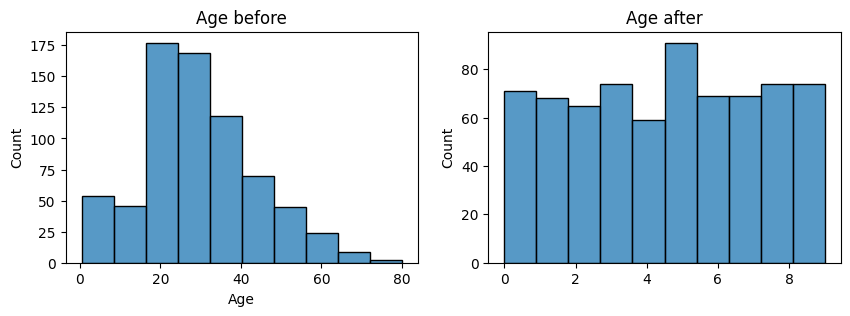

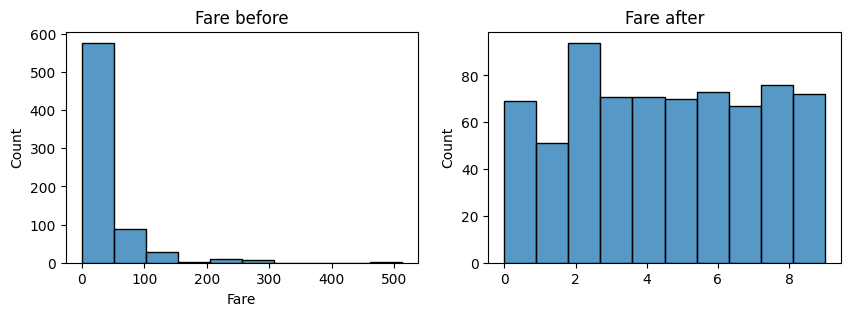

In [114]:
discretize(10, "quantile")

### Uniform

0.6275430359937402


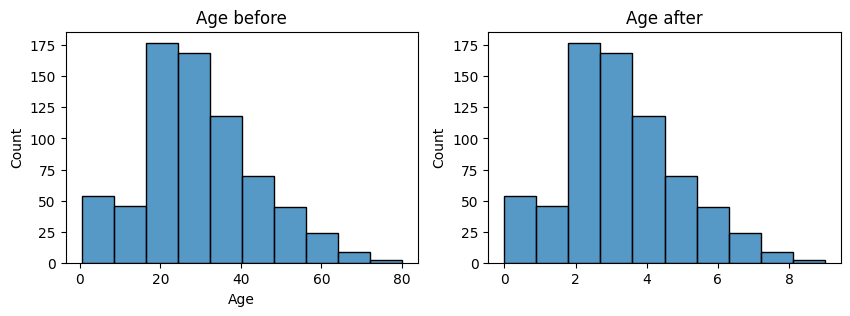

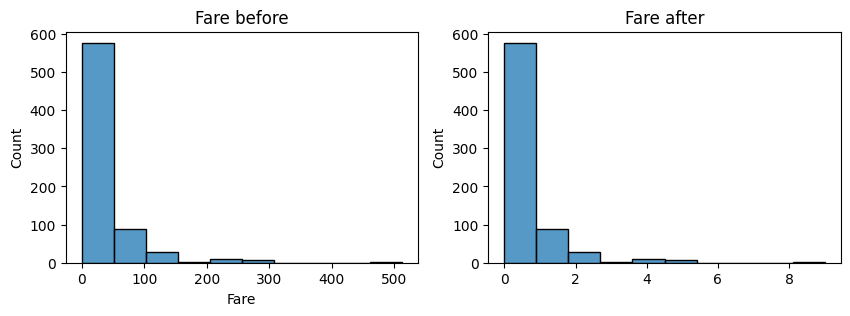

In [116]:
discretize(10, "uniform")

### Kmeans

0.6345266040688575


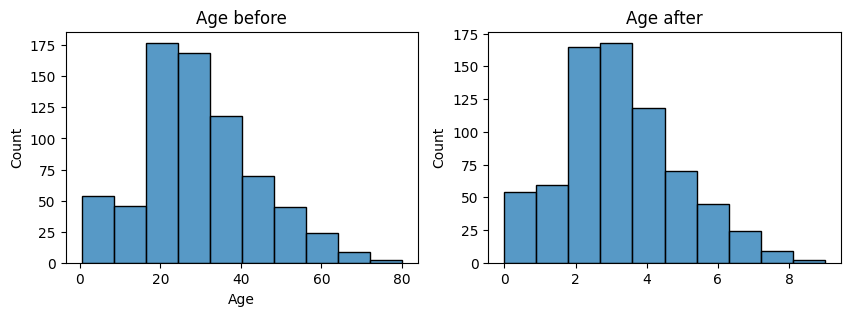

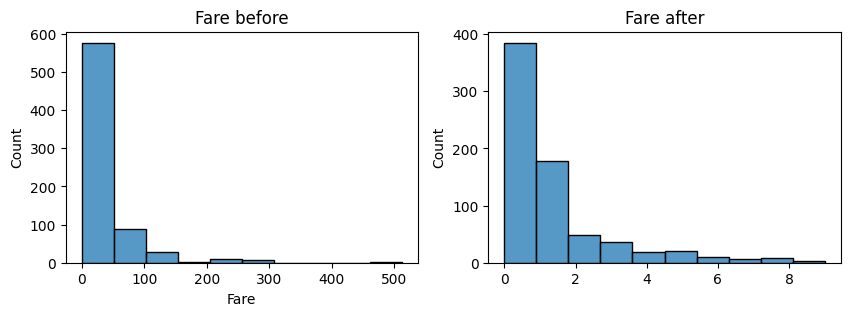

In [117]:
discretize(10, "kmeans")